# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
df = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = df.loc[:, subset]

data.head(10)

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
0,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500
1,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500
2,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500
3,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000
4,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000
5,2009,10,0,5,1362,1,1995,1993,5,5,14115,143000
6,2007,8,1,7,1694,2,2005,2004,5,8,10084,307000
7,2009,11,2,7,2090,2,1973,1973,6,7,10382,200000
8,2008,4,2,8,1774,2,1950,1931,5,7,6120,129900
9,2008,1,2,5,1077,1,1950,1939,6,5,7420,118000


The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
data.describe()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2007.815753,6.321918,0.613014,6.517808,1515.463699,1.565068,1984.865753,1971.267808,5.575342,6.099315,10516.828082,180921.195890
std,1.328095,2.703626,0.644666,1.625393,525.480383,0.550916,20.645407,30.202904,1.112799,1.382997,9981.264932,79442.502883
min,2006.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1950.000000,1872.000000,1.000000,1.000000,1300.000000,34900.000000
25%,2007.000000,5.000000,0.000000,5.000000,1129.500000,1.000000,1967.000000,1954.000000,5.000000,5.000000,7553.500000,129975.000000
50%,2008.000000,6.000000,1.000000,6.000000,1464.000000,2.000000,1994.000000,1973.000000,5.000000,6.000000,9478.500000,163000.000000
75%,2009.000000,8.000000,1.000000,7.000000,1776.750000,2.000000,2004.000000,2000.000000,6.000000,7.000000,11601.500000,214000.000000
max,2010.000000,12.000000,3.000000,14.000000,5642.000000,3.000000,2010.000000,2010.000000,9.000000,10.000000,215245.000000,755000.000000


In [3]:
data.columns

Index(['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
       'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual',
       'LotArea', 'SalePrice'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
YrSold          1460 non-null int64
MoSold          1460 non-null int64
Fireplaces      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
YearRemodAdd    1460 non-null int64
YearBuilt       1460 non-null int64
OverallCond     1460 non-null int64
OverallQual     1460 non-null int64
LotArea         1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12)
memory usage: 137.0 KB


In [5]:
# Record your observations here 
# all integers
# no null values
# yearsold, monthsold, may need to be considered categorical columns

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Joey\anaconda3

array([[<AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MoSold'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'YrSold'}>]], dtype=object)

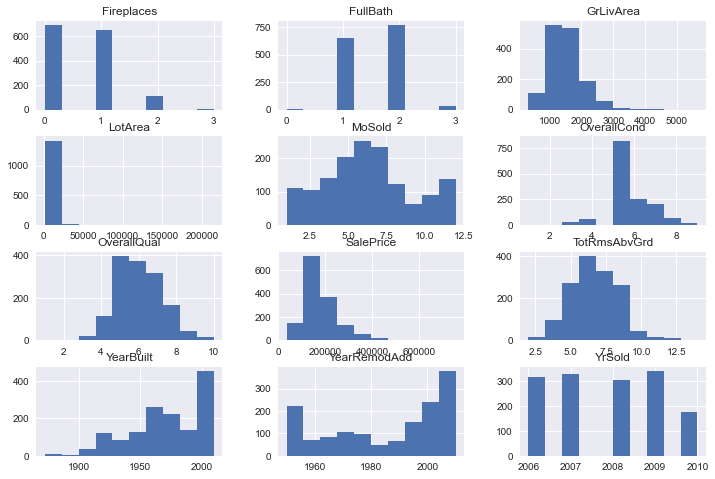

In [6]:
# Your code here 
data.hist(figsize=(12,8))

In [3]:
# You observations here 
#somewhat uniform distributions: totrmsabvgrd, saleprice, overallqual, grlivingarea

### Check the linearity assumption for all chosen features with target variable using scatter plots

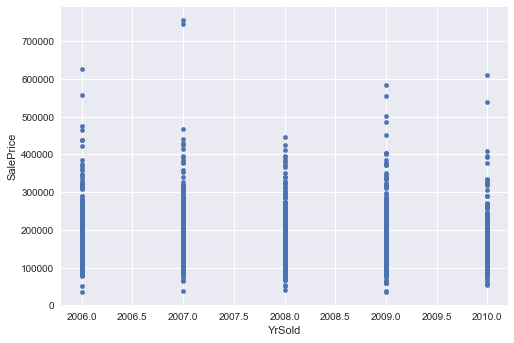

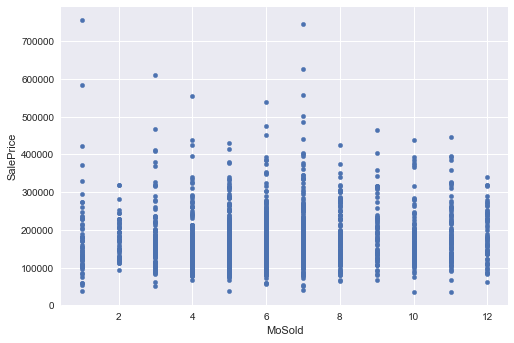

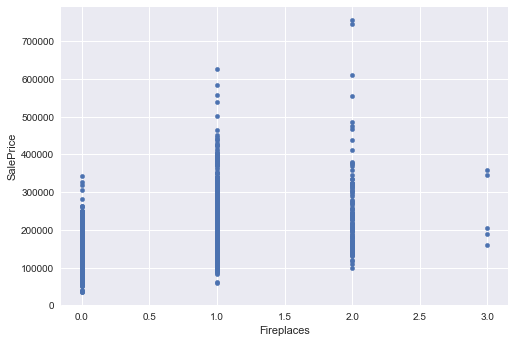

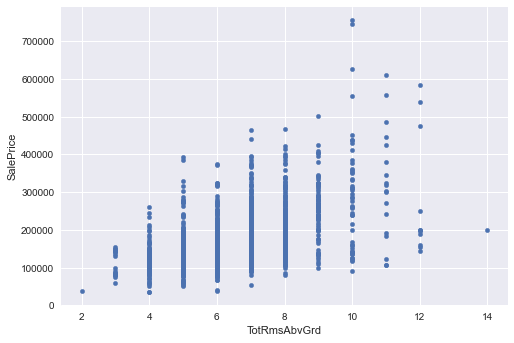

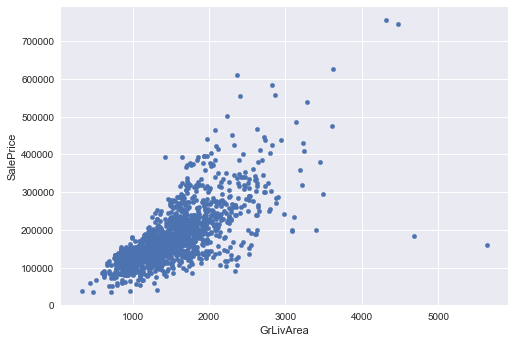

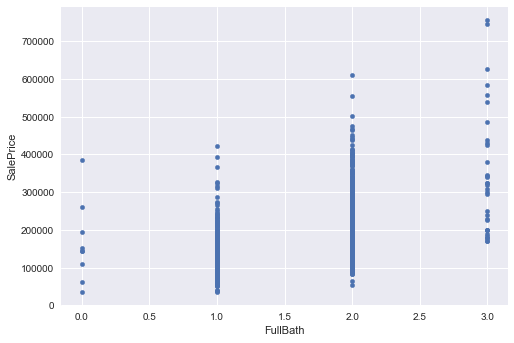

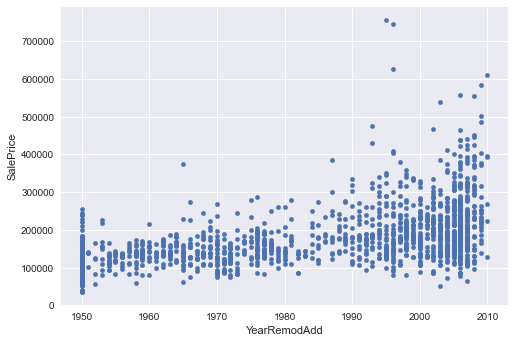

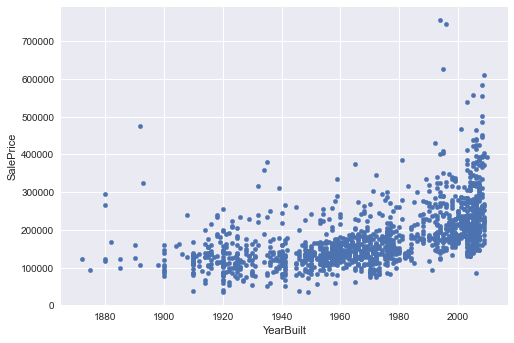

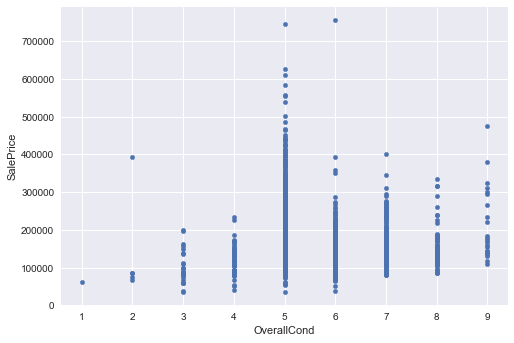

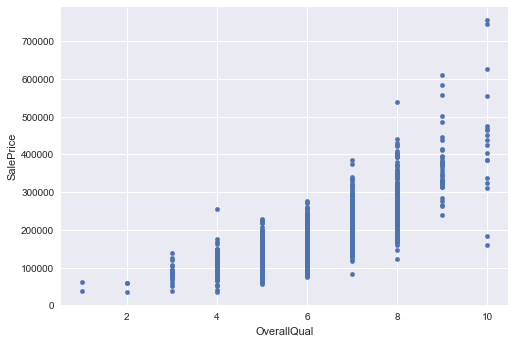

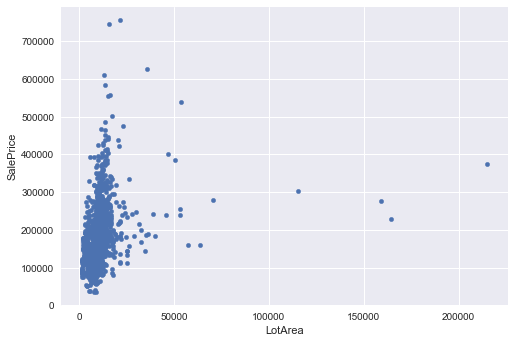

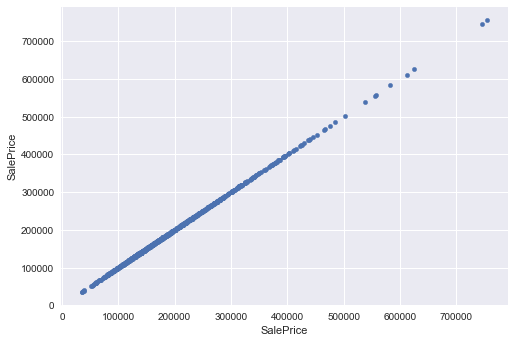

In [27]:
# Your code here 
for col in data.columns:
    data.plot.scatter(y='SalePrice', x=col)

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [7]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

target = 'SalePrice'
f = target + '~' + '+'.join(data.columns.drop(['SalePrice']))
f

'SalePrice~YrSold+MoSold+Fireplaces+TotRmsAbvGrd+GrLivArea+FullBath+YearRemodAdd+YearBuilt+OverallCond+OverallQual+LotArea'

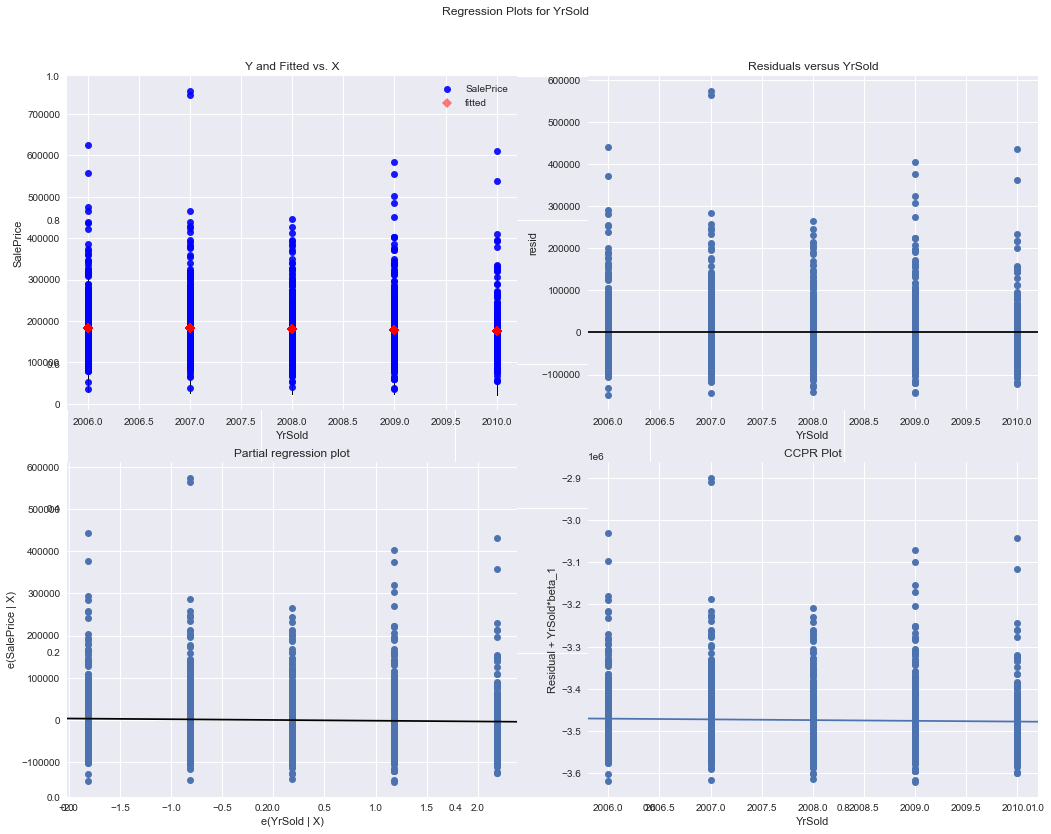

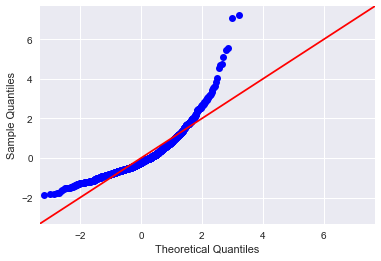

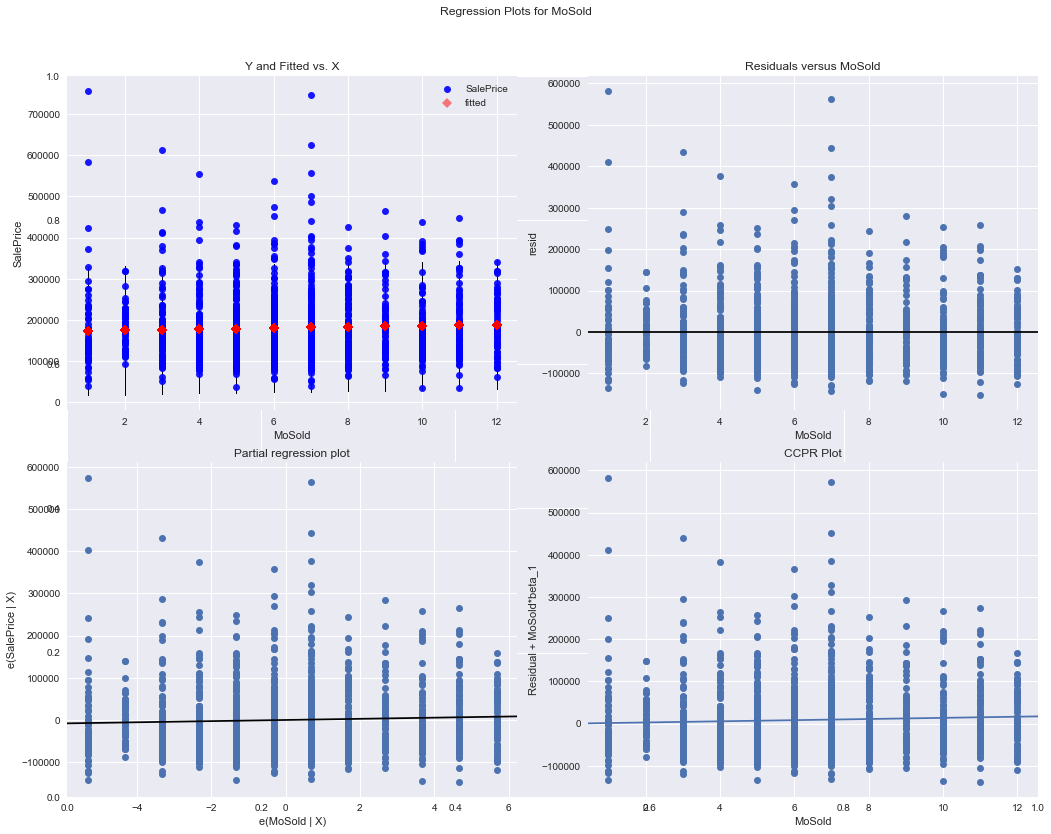

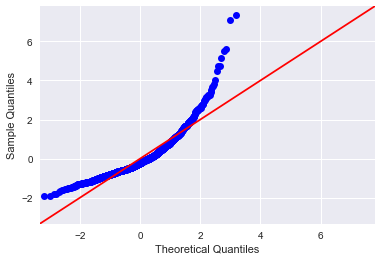

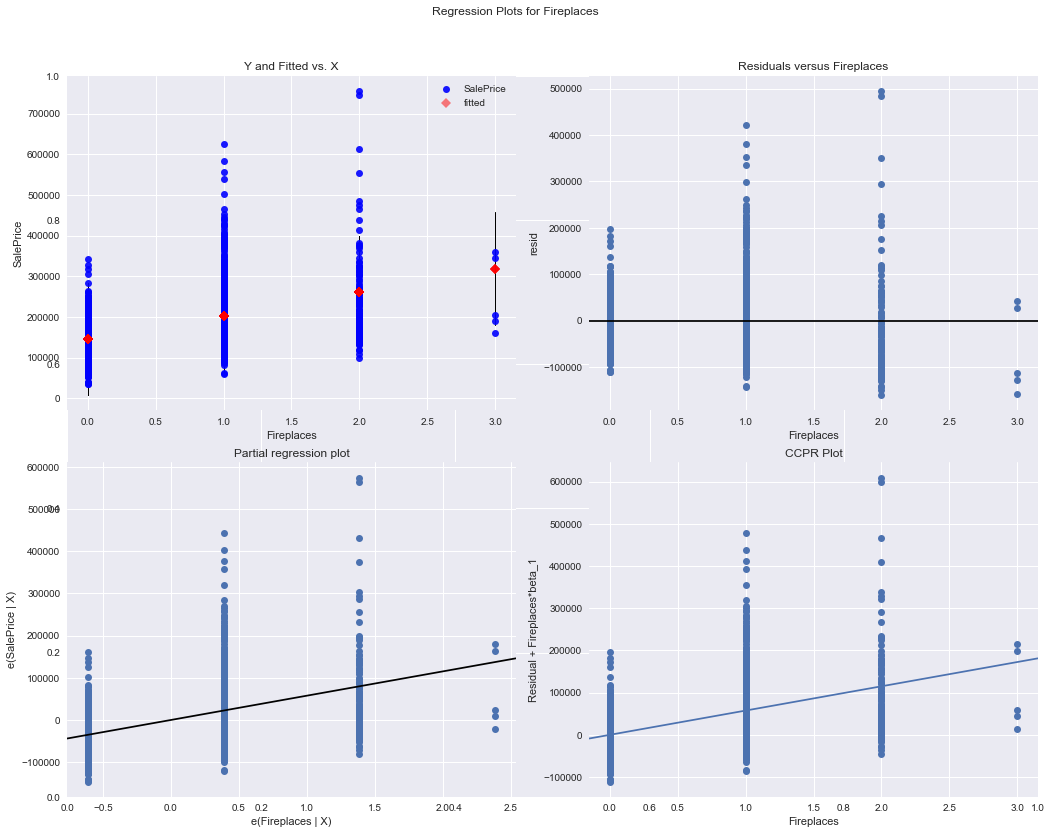

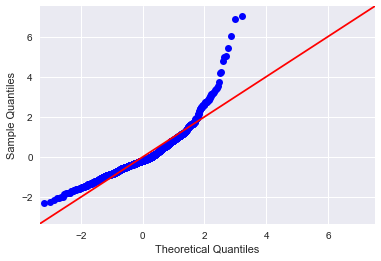

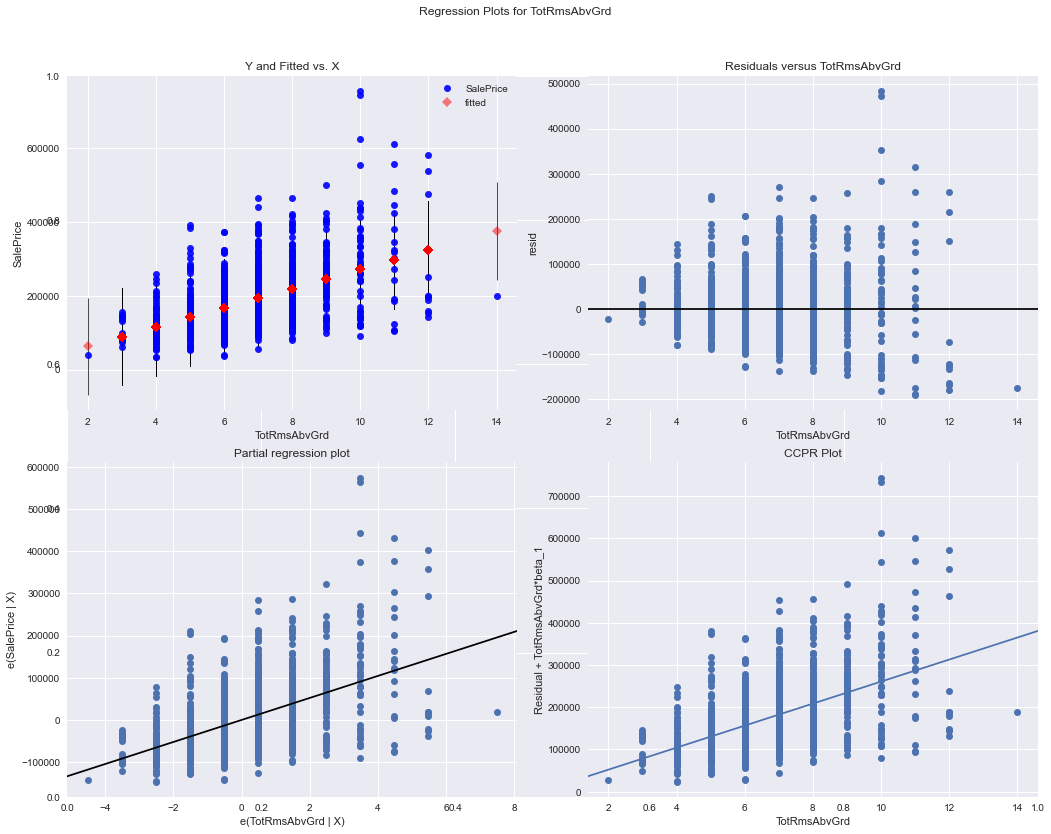

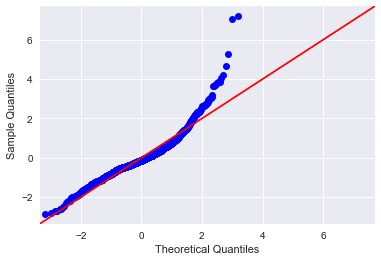

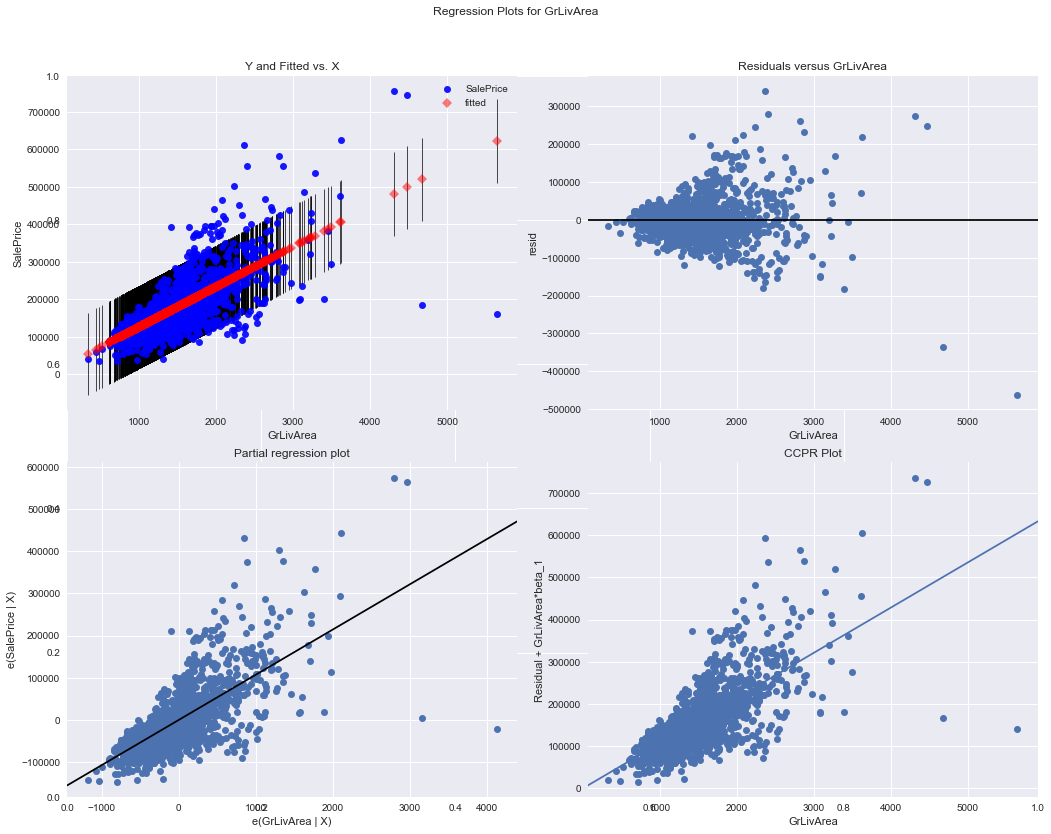

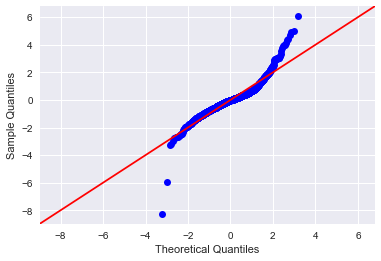

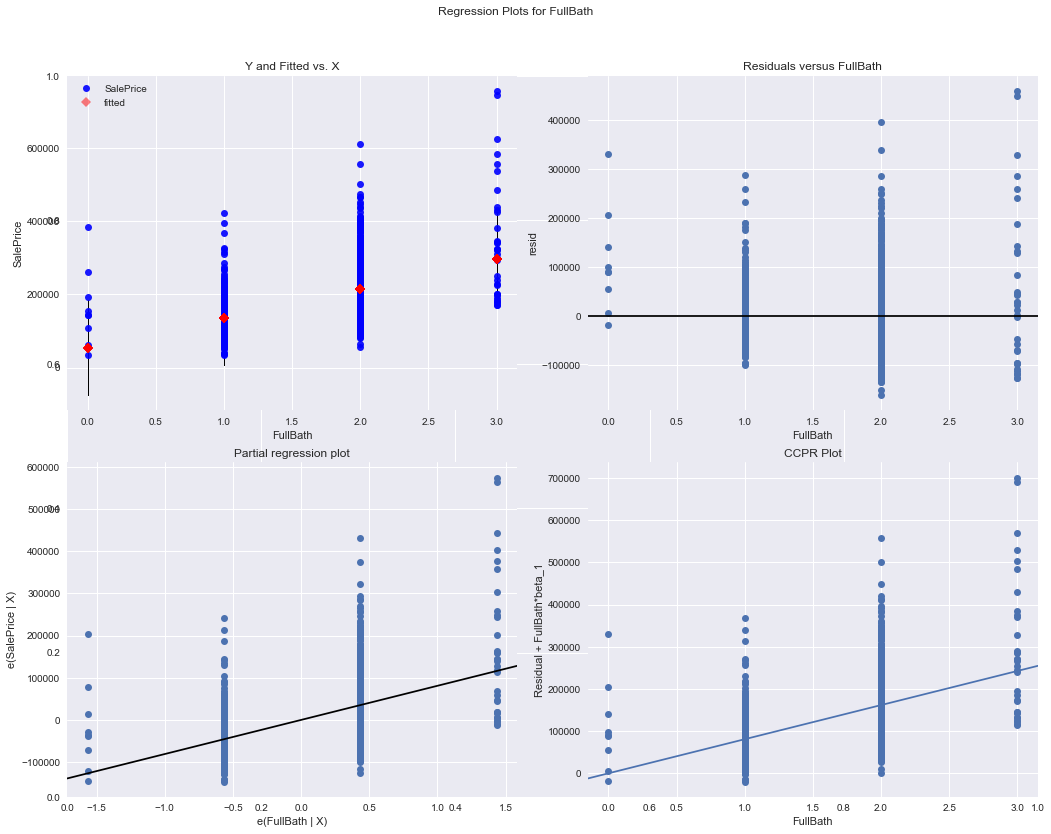

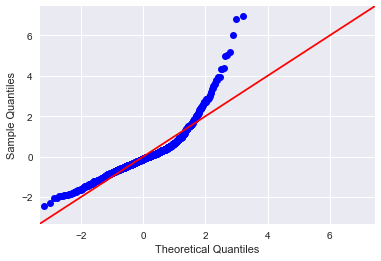

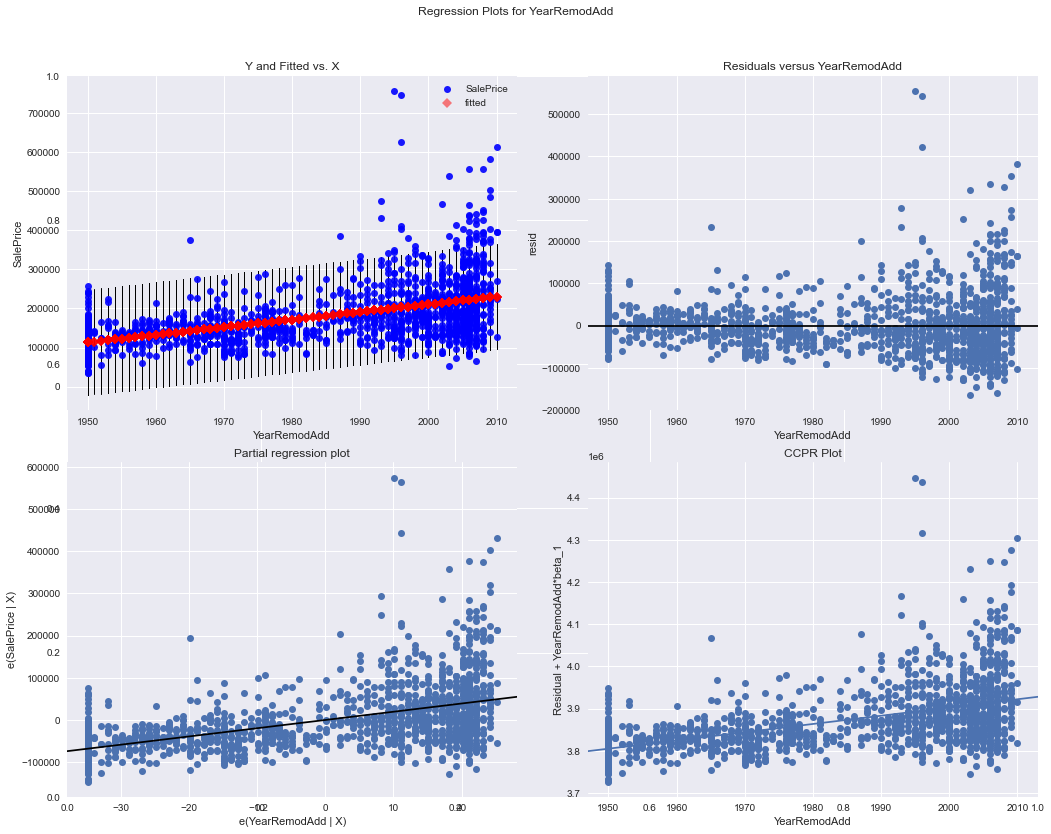

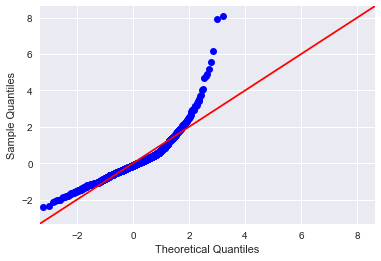

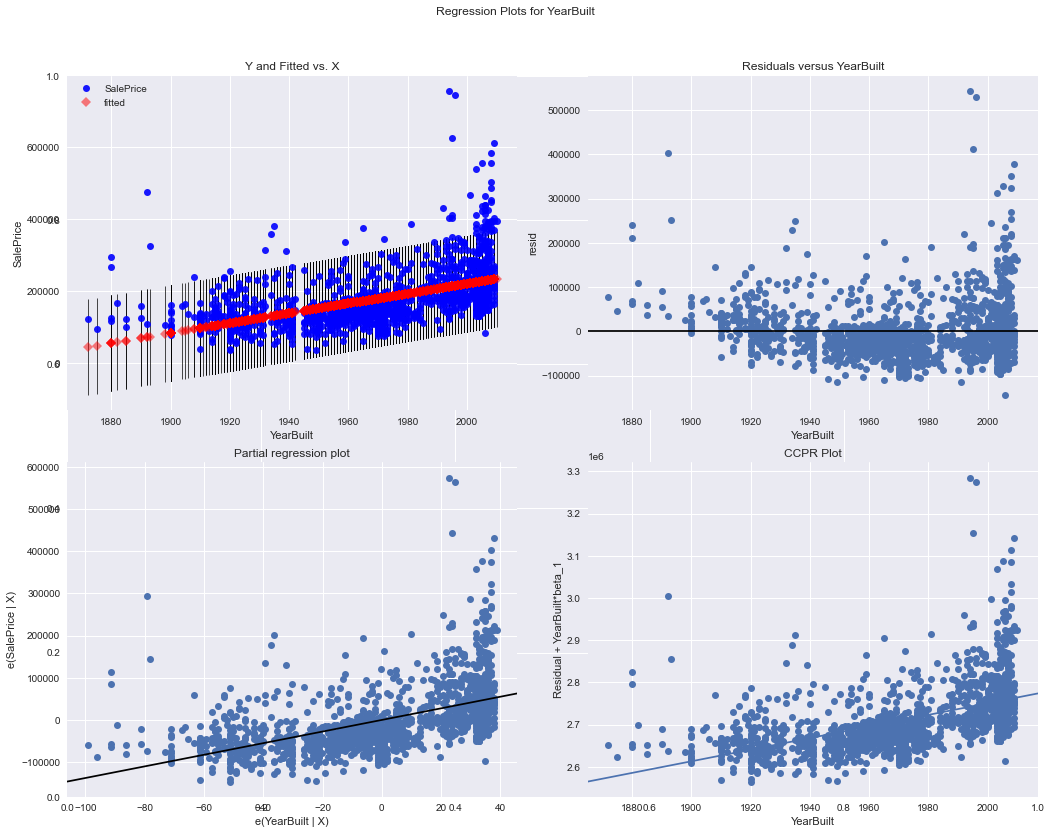

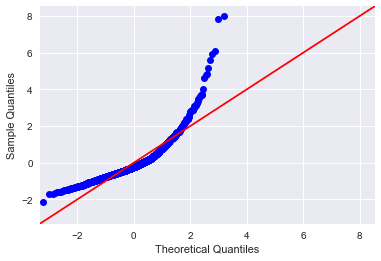

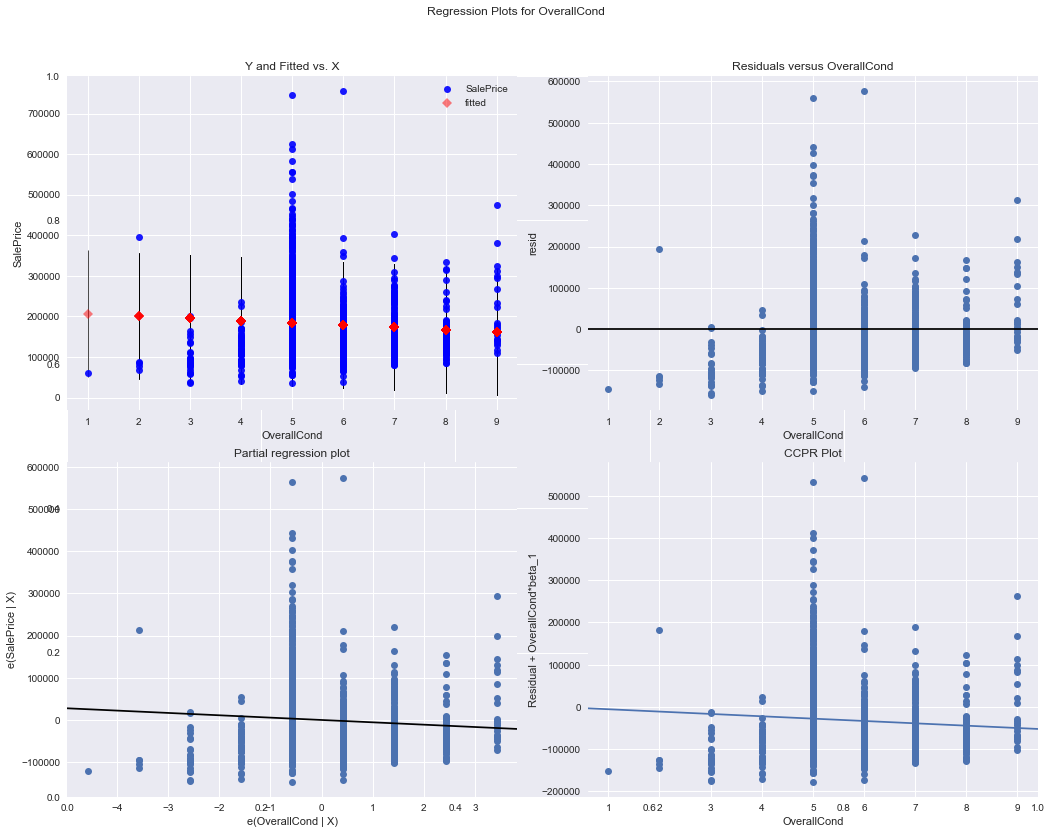

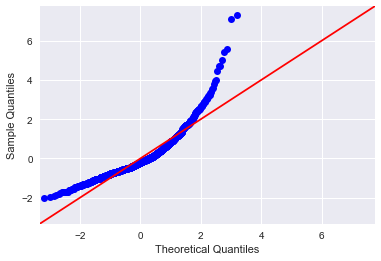

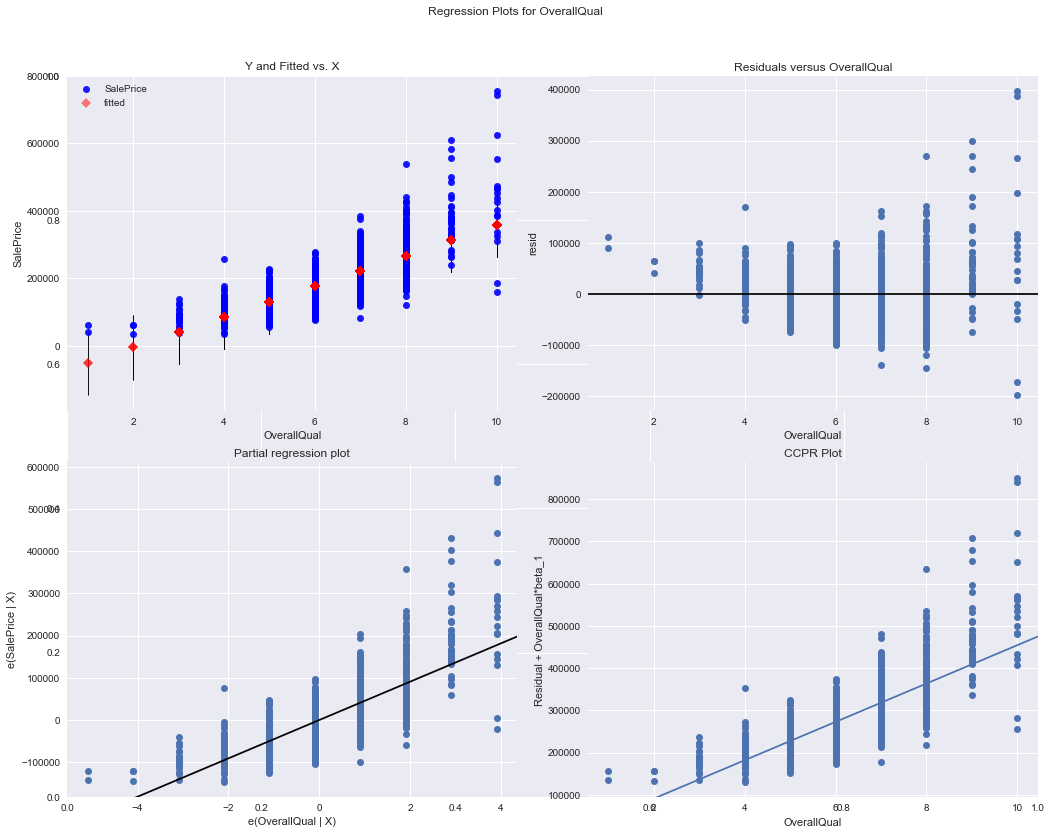

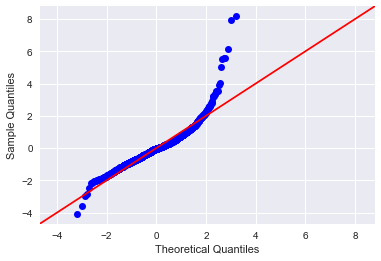

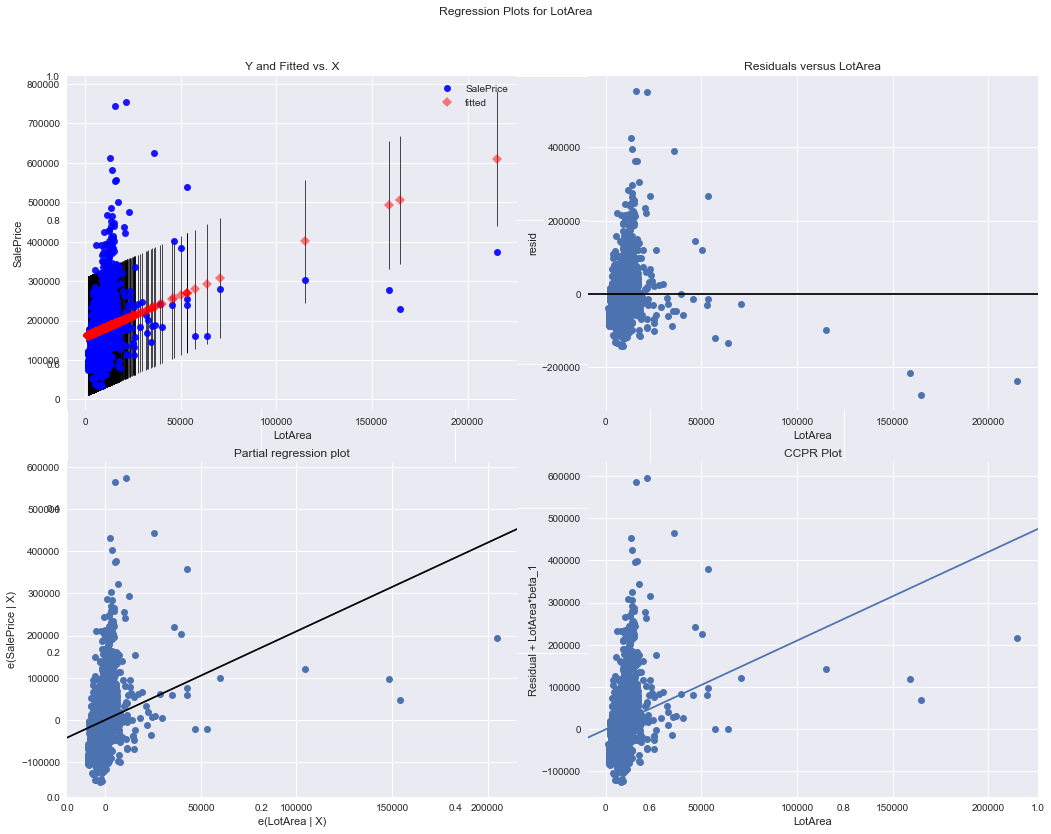

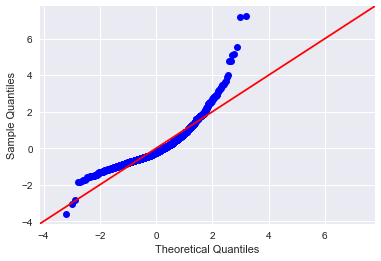

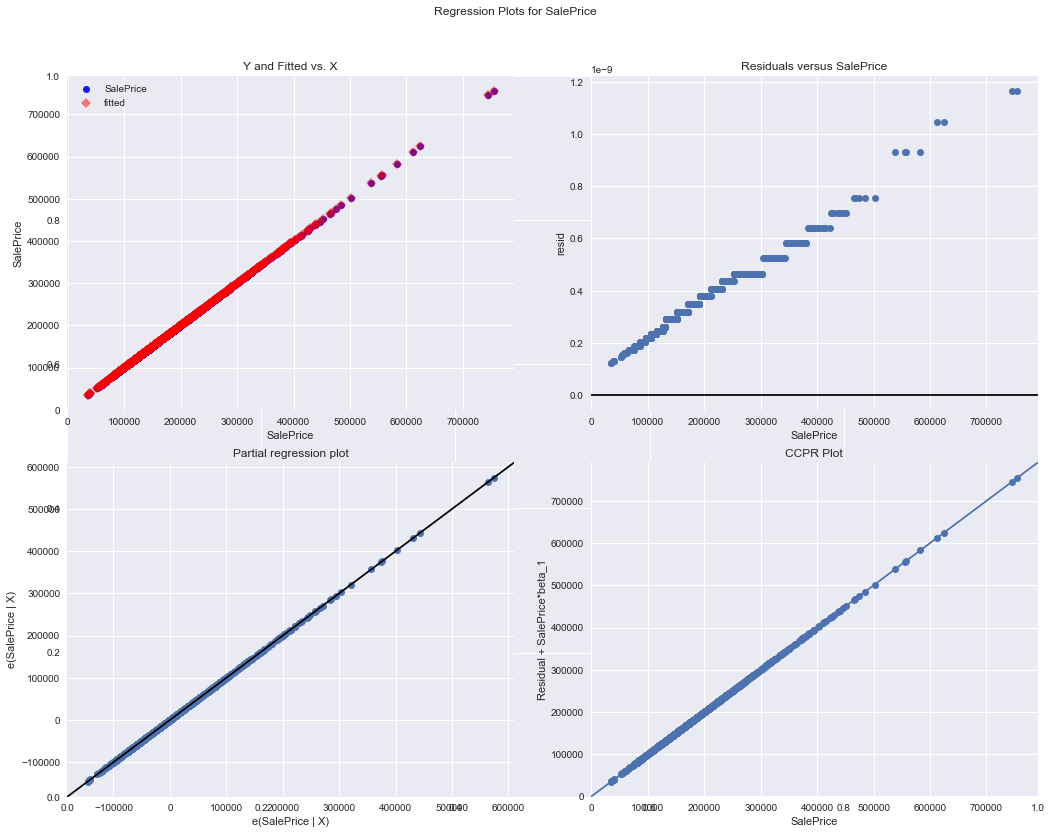

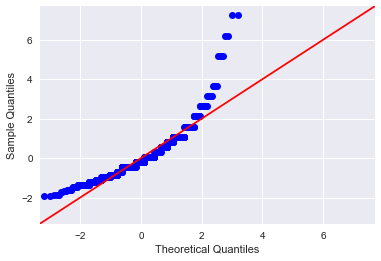

In [13]:
results = []
for idx, col in enumerate(data.columns):
    f = f'SalePrice~{col}'
    model = smf.ols(formula=f, data=data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [15]:
pd.DataFrame(results, columns=['independent_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (jb)' ])

,independent_var,r_squared,intercept,slope,p-value,normality (jb)
0,YrSold,0.000837,3.654560e+06,-1730.058729,2.694132e-01,3432.757805
1,MoSold,0.002156,1.722959e+05,1364.350502,7.612758e-02,3588.247231
2,Fireplaces,0.218023,1.456485e+05,57539.831838,6.141487e-80,3092.993348
3,TotRmsAbvGrd,0.284860,1.089647e+04,26086.180847,2.772281e-108,2240.440266
4,GrLivArea,0.502149,1.856903e+04,107.130359,4.518034e-223,3432.286565
5,FullBath,0.314344,5.438828e+04,80848.166787,1.236470e-121,3515.004761
6,YearRemodAdd,0.257151,-3.692146e+06,1951.299406,3.164948e-96,5931.459064
7,YearBuilt,0.273422,-2.530308e+06,1375.373468,2.990229e-103,6856.947031
8,OverallCond,0.006062,2.119096e+05,-5558.115361,2.912351e-03,3406.240879
9,OverallQual,0.625652,-9.620608e+04,45435.802593,2.185675e-313,5872.097631


Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.